# Exercises on dynamics

## 1. Free-fall experiment:
We wish to measure the acceleration of gravity based on data from a free-fall experiment in which we drop an object and measure the time it takes for it to reach different distanteces. The object starts from rest.

Data file: https://github.com/wbandabarragan/computational-physics-1/blob/main/unit-1/sample_data/data_freefall.csv

In [7]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import scipy.optimize as opt

In [9]:
# Get data into data frame
df_1 = pd.read_csv("./sample_data/data_freefall.csv", sep = ",")

# Read in the columns
time = np.array(df_1["Time (s)"])
position = np.array(df_1["Position (m)"])

# Inspect data
#print(df_1)

#### Plot data:

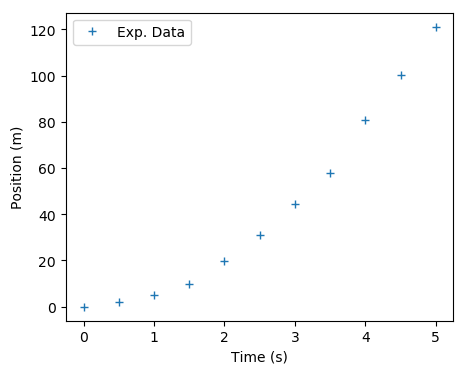

In [10]:
# Create a figure environment

fig = plt.figure(figsize = (5,4))

plt.plot(time, position, linestyle = " ", marker = "+", label = "Exp. Data")

plt.xlabel("Time (s)")
plt.ylabel("Position (m)")

plt.legend()

plt.show()

### Evaluate monotonic behaviour and linearity

In [6]:
# Let's calculate these coefficients

# 1. Spearman coefficient
sp = st.spearmanr(time, position)

# 2. Pearson coefficient
pe = st.pearsonr(time, position)

print("Spearman:\n", sp)

print("Pearson:\n", pe)

Spearman:
 SpearmanrResult(correlation=1.0, pvalue=0.0)
Pearson:
 (0.9626893939403707, 2.076326993227384e-06)


### 1st Approach:

We need a physically-motivated model;

$$d = \alpha\,t^2$$

where $\alpha= \frac{g}{2}$

In [13]:
# Define fitting model

def fit_parabola(x_values, alpha):
    """
    Parabolic function with 1 free parameter (alpha)
    Inputs: x_values are time values, alpha = free param.
    Output: y_values are distance values
    """
    y_values = alpha*x_values**2
    
    return y_values


In [14]:
# Call the curve_fit function

coef, cova = opt.curve_fit(fit_parabola, time, position)

print(coef)

[4.90275925]


In [15]:
# Use the result to define the fitted Y values

position_fit1 = fit_parabola(time, *coef)

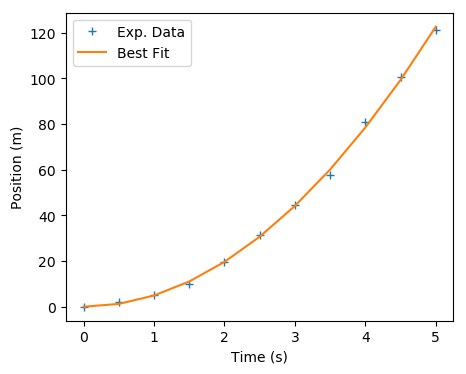

In [16]:
# Plotting

# Create a figure environment

fig = plt.figure(figsize = (5,4))

plt.plot(time, position, linestyle = " ", marker = "+", label = "Exp. Data")
plt.plot(time, position_fit1, linestyle = "-", label = "Best Fit")

plt.xlabel("Time (s)")
plt.ylabel("Position (m)")

plt.legend()

plt.show()

#### Are we getting the correct value for the acceleration of gravity?


In [21]:
print("Estimated g = %.5f m/s^2" % (2*coef[0]))

Estimated g = 9.80552 m/s^2


### 2nd Approach:

We need a physically-motivated model;

$$d = \alpha\,t^2$$

where $\alpha= \frac{g}{2}$

We can linearise the model by introducing a new variable:

$$\tau = t^2$$

$$\Rightarrow d = \alpha\,\tau$$



In [23]:
# Compute tau
tau = time**2

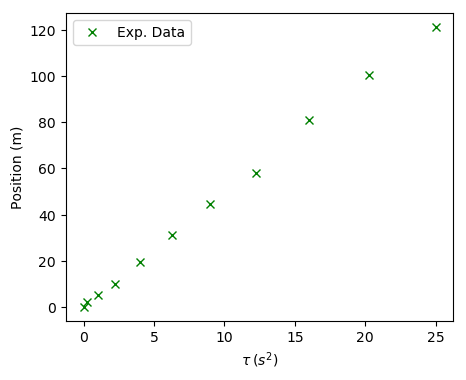

In [26]:
# Create a figure environment

fig = plt.figure(figsize = (5,4))

plt.plot(tau, position, linestyle = " ", color = "green",\
         marker = "x", label = "Exp. Data")

plt.xlabel(r"$\tau\:(s^2)$")
plt.ylabel("Position (m)")

plt.legend()

plt.show()

#### Re-analise the monotonic and linear behaviour:

In [27]:
# Let's calculate these coefficients

# 1. Spearman coefficient
sp2 = st.spearmanr(tau, position)

# 2. Pearson coefficient
pe2 = st.pearsonr(tau, position)

print("Spearman:\n", sp2)

print("Pearson:\n", pe2)

Spearman:
 SpearmanrResult(correlation=1.0, pvalue=0.0)
Pearson:
 (0.9995329682460816, 6.014270022003437e-15)


In [28]:
# Define new fitting model

def fit_line(x_values, alpha):
    """
    Parabolic function with 1 free parameter (alpha)
    Inputs: x_values are time values, alpha = free param.
    Output: y_values are distance values
    """
    y_values = alpha*x_values
    
    return y_values


In [35]:
# Call the curve_fit function
coef2, cova2 = opt.curve_fit(fit_line, tau, position)

print(type(coef2))

print(coef2[0])
print(*coef2)

<class 'numpy.ndarray'>
4.9027592468407075
4.9027592468407075


In [30]:
# Use the result to define the new fitted Y values

position_fit2 = fit_line(tau, *coef2)

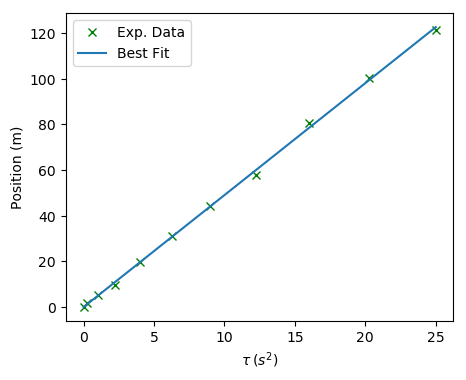

In [32]:
# Plotting

# Create a figure environment

fig = plt.figure(figsize = (5,4))

plt.plot(tau, position, linestyle = " ", color = "green",\
         marker = "x", label = "Exp. Data")
plt.plot(tau, position_fit2, linestyle = "-", label = "Best Fit")

plt.xlabel(r"$\tau\:(s^2)$")
plt.ylabel("Position (m)")

plt.legend()

plt.show()

In [36]:
print("Estimated g = %.5f m/s^2" % (2*coef2[0]))

Estimated g = 9.80552 m/s^2


## 2. Pendulum experiment

See a interesting applet here:

https://phet.colorado.edu/sims/html/pendulum-lab/latest/pendulum-lab_en.html

Our job is to determine the acceleration of gravity from simple pendulum data. A physically motivated model is:

$$T = 2\pi\sqrt{\frac{L}{g}}$$

Thus, we need to carry out a regression for which we will use the averages of the 5 data points taken for the period $T$.

Data file: https://github.com/wbandabarragan/computational-physics-1/blob/main/unit-1/sample_data/data_pendulum.csv

In [49]:
# Get data into data frame
df_2 = pd.read_csv("./sample_data/data_pendulum.csv", sep = ",")

#print(df_2)

# We get data columns into pd.Series
length  = df_2["Length(m)"]
period1 = df_2["Period1(s)"]
period2 = df_2["Period2(s)"]
period3 = df_2["Period3(s)"]
period4 = df_2["Period4(s)"]
period5 = df_2["Period5(s)"]

# Let's use iloc to get rown information
print(df_2.iloc[0][1:])

print(np.array(df_2.iloc[0][1:]))

print(np.mean(np.array(df_2.iloc[0][1:])))
print(np.std(np.array(df_2.iloc[0][1:])))


#print(period1)

Period1(s)    0.53
Period2(s)    0.52
Period3(s)    0.60
Period4(s)    0.65
Period5(s)    0.59
Name: 0, dtype: float64
[0.53 0.52 0.6  0.65 0.59]
0.578
0.04791659420284375


In [56]:
# Empty lists to receive the average values

mean_p = []
stdv_p = []

for i in range(len(df_2["Period1(s)"])):
    #print(i)
    mean_p.append(np.mean(np.array(df_2.iloc[i][1:])))
    stdv_p.append(np.std(np.array(df_2.iloc[i][1:])))

mean_p = np.array(mean_p) # average values
stdv_p = np.array(stdv_p) # uncertainties

#print(mean_p)
#print(stdv_p)

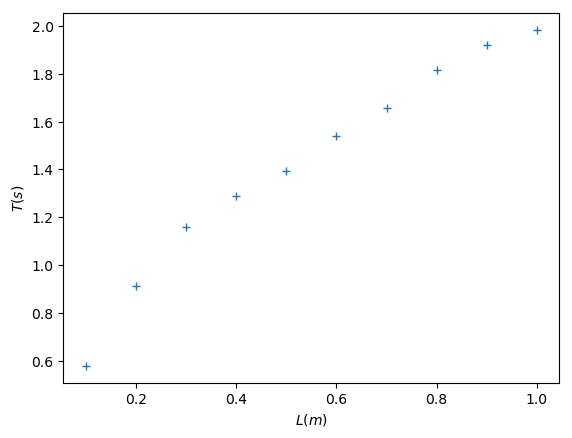

In [60]:
# Plot of the data

plt.figure()

plt.plot(length, mean_p, linestyle = " ", marker = "+")

plt.xlabel(r"$L (m)$")
plt.ylabel(r"$T (s)$")

plt.show()

Fitting model:

$$T = 2\pi\sqrt{\frac{L}{g}}$$

$$T = \frac{2\pi}{\sqrt{g}}\sqrt{L}$$

$$T = \beta\sqrt{L}$$


In [68]:
# Define new fitting model

def fit_sqrt(x_values, beta):
    """
    Parabolic function with 1 free parameter (beta)
    Inputs: x_values are time values, beta = free param.
    Output: y_values are distance values
    """
    y_values = beta*np.sqrt(x_values)
    
    return y_values

In [69]:
# Call the curve_fit function
coef3, cova3 = opt.curve_fit(fit_sqrt, length, mean_p)

print("beta is = ", coef3[0])

beta is =  2.006513337645759


#### Acceleration of gravity:

$$g = \frac{4\pi^2}{\beta^2}$$

In [70]:
print("g is = ", (4*np.pi**2/coef3[0]**2))

g is =  9.805633005014405


### Plotting wih error bars:

In [82]:
# Use the result to define the new fitted Y values

mean_pfit = fit_sqrt(length, *coef3)

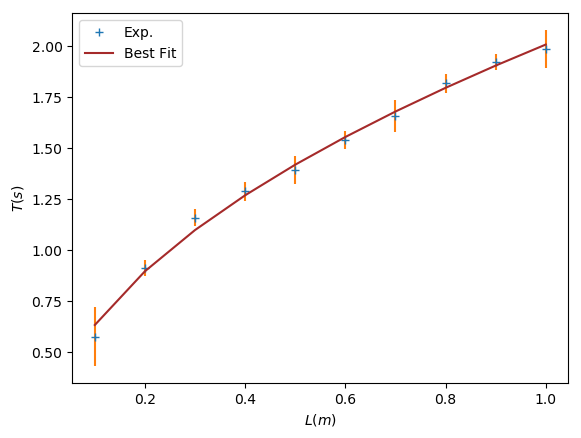

In [85]:
# Plot of the data

fig, ax = plt.subplots()

ax.plot(length, mean_p, linestyle = " ", marker = "+", label = "Exp.")
ax.plot(length, mean_pfit, linestyle = "-", color = "brown"\
       , label = "Best Fit")
ax.errorbar(length, mean_p, yerr = 3*stdv_p, linestyle = " ")

ax.set_xlabel(r"$L (m)$")
ax.set_ylabel(r"$T (s)$")

plt.legend()

plt.show()